\section{Introduction}
We consider the Hamiltonian
\begin{equation}
H=-\sum_{\sigma}\sum_{\langle{ij}\rangle}(t_{ij}c_{i\sigma}^{\dagger}c_{j\sigma}+h.c.),
\end{equation}
with $t_{ij}=|t|e^{\text{i}\theta_{ij}}$ various kinds of lattices. $|t|=1.0$.

The unit cell of Kagome lattice consists of three sites.

In [6]:
# kagome lattice

import numpy as np
from numpy import linalg as la

PI = np.pi

numUC1 = 24
numUC2 = 24
sizeUC = 3
numUC = numUC1*numUC2
numSite = numUC*sizeUC

dim = numSite
numFermion = int (numSite / 2) # half-filled

def CoordinateKagome (i, j, k):
    return (j*(numUC1*sizeUC))+(i*sizeUC)+k

'''
def HamiltonianKagomeBest ():
    Ham = np.zeros ((dim, dim), dtype=complex)
    for j in range (numUC2):
        for i in range (numUC1):
            for k in range (sizeUC):
                r = CoordinateKagome (i, j, k)
                # find the neighbor sites
                if (0 == k):
                    r0 = CoordinateKagome ((i-1) % numUC1, j, 1)
                    r1 = CoordinateKagome (i, j, 1)
                    Ham[r][r0] = -1.0*np.exp (1.j*0.5*PI)
                    Ham[r0][r] = np.conjugate (Ham[r][r0])
                    Ham[r][r1] = -1.0*np.exp (-1.j*0.5*PI)
                    Ham[r1][r] = np.conjugate (Ham[r][r1])
                elif (1 == k):
                    r0 = CoordinateKagome ((i+1) % numUC1, (j-1) % numUC2, 2)
                    r1 = CoordinateKagome (i, j, 2)
                    Ham[r][r0] = -1.0*np.exp (-1.j*0.5*PI)
                    Ham[r0][r] = np.conjugate (Ham[r][r0])
                    if (0 == i % 2):
                        Ham[r][r1] = -1.0*np.exp (1.j*0.5*PI)
                        Ham[r1][r] = np.conjugate (Ham[r][r1])
                    else:
                        Ham[r][r1] = -1.0*np.exp (-1.j*0.5*PI)
                        Ham[r1][r] = np.conjugate (Ham[r][r1])
                elif (2 == k):
                    r0 = CoordinateKagome (i, j, 0)
                    r1 = CoordinateKagome (i, (j+1) % numUC2, 0)
                    Ham[r][r1] = -1.0*np.exp (-1.j*0.5*PI)
                    Ham[r1][r] = np.conjugate (Ham[r][r1])
                    if (0 == i % 2):
                        Ham[r][r0] = -1.0*np.exp (-1.j*0.5*PI)
                        Ham[r0][r] = np.conjugate (Ham[r][r0])
                    else:
                        Ham[r][r0] = -1.0*np.exp (1.j*0.5*PI)
                        Ham[r0][r] = np.conjugate (Ham[r][r0])
    return Ham
'''

def HamiltonianKagomeBest ():
    H = np.zeros ((dim, dim), dtype=complex)
    for j in range (numUC2):
        for i in range (numUC1):
            # three sites within a lattice unit cell
            r0 = CoordinateKagome (i, j, 0)
            r1 = CoordinateKagome (i, j, 1)
            r2 = CoordinateKagome (i, j, 2)
            # the other four related sites
            s0 = CoordinateKagome ((i+1) % numUC1, j, 0)
            s1 = CoordinateKagome ((i+1) % numUC1, j, 2)
            s2 = CoordinateKagome (i, (j+1) % numUC2, 0)
            s3 = CoordinateKagome (i, (j+1) % numUC2, 1)
            if (0 == i % 2) and (0 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (-1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (+1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])
            elif (1 == i % 2) and (0 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (-1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (-1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (-1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (+1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])
            elif (0 == i % 2) and (1 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (-1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (+1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])
            elif (1 == i % 2) and (1 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (-1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (-1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (-1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (+1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])            
    return H

def HamiltonianKagomeUC22 (args):
    H = np.zeros ((dim, dim), dtype=complex)
    for j in range (numUC2):
        for i in range (numUC1):
            # three sites within a lattice unit cell
            r0 = CoordinateKagome (i, j, 0)
            r1 = CoordinateKagome (i, j, 1)
            r2 = CoordinateKagome (i, j, 2)
            # the other four related sites
            s0 = CoordinateKagome ((i+1) % numUC1, j, 0)
            s1 = CoordinateKagome ((i+1) % numUC1, j, 2)
            s2 = CoordinateKagome (i, (j+1) % numUC2, 0)
            s3 = CoordinateKagome (i, (j+1) % numUC2, 1)
            if (0 == i % 2) and (0 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (args[0]*1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (+1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (args[1]*1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])
            elif (1 == i % 2) and (0 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (args[2]*1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (args[3]*1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (args[4]*1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])
            elif (0 == i % 2) and (1 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (args[5]*1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (+1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (+1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (args[6]*1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])
            elif (1 == i % 2) and (1 == j % 2):
                # hopping within the lattice unit cell
                H[r0][r1] = -1.0*np.exp (+1.j*0.5*PI)
                H[r1][r0] = np.conjugate (H[r0][r1])
                H[r0][r2] = -1.0*np.exp (+1.j*0.5*PI)
                H[r2][r0] = np.conjugate (H[r0][r2])
                H[r1][r2] = -1.0*np.exp (args[7]*1.j*0.5*PI)
                H[r2][r1] = np.conjugate (H[r1][r2])
                # the other hoppings
                H[r1][s0] = -1.0*np.exp (args[8]*1.j*0.5*PI)
                H[s0][r1] = np.conjugate (H[r1][s0])
                H[r2][s2] = -1.0*np.exp (args[9]*1.j*0.5*PI)
                H[s2][r2] = np.conjugate (H[r2][s2])
                H[s1][s3] = -1.0*np.exp (args[10]*1.j*0.5*PI)
                H[s3][s1] = np.conjugate (H[s1][s3])            
    return H

def GSEnergy (Ham, nf):
    w, v = la.eigh (Ham)
    ene = 0.0
    for i in range (nf):
        ene += w[i]
    return (ene / numSite)


In [7]:
print (GSEnergy (HamiltonianKagomeBest (), numFermion))

test = [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0]
print (GSEnergy (HamiltonianKagomeUC22 (test), numFermion))

test0 = [1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3] # [+\pi/2, +\pi/2, 0]
test1 = [0, 2, 0, 3, 0, 0, 2, 0, 1, 3, 0] # [0, 0, \pi]
test2 = [1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1] # [+\pi/2, -\pi/2, \pi]
test3 = [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0] # [0, 0, 0]


print ('examples')
print (GSEnergy (HamiltonianKagomeUC22 (test0), numFermion))
print (GSEnergy (HamiltonianKagomeUC22 (test1), numFermion))
print (GSEnergy (HamiltonianKagomeUC22 (test2), numFermion))
print (GSEnergy (HamiltonianKagomeUC22 (test3), numFermion))

-0.8991166371980468
-0.8640790825542033
examples
-0.8991166371980468
-0.8854851749326755
-0.8651571367479429
-0.864226157393204


In [84]:
def ToStr (n, base):
   convertString = "0123456789ABCDEF"
   if n < base:
      return convertString[n]
   else:
      return ToStr (n // base, base) + convertString[n % base]

# testStr = ToStr (23, 4)
# print (testStr, testStr[2], int (testStr[2]))

numArgs = 11
numPos = int (np.power (4, numArgs))

ene = []
for i in range (numPos):
    if (0 == i % 1e5):
        print (i)
    s = ToStr (i, 4)
    s = s.rjust (numArgs, '0')
    arg = []
    for l in range (numArgs):
        arg.append (int (s[l]))
    e = GSEnergy (HamiltonianKagomeUC22 (arg), numFermion)
    ene.append (e)
    
print (np.sort (ene))

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
[-0.89905688 -0.89905688 -0.89458404 ... -0.79251573 -0.78033009
 -0.78033009]


-0.8991166324630736


In [21]:
from itertools import combinations

ls = []
for i in [1, 0, -1]:
    for j in range (6):
        ls.append (i)
        
print (ls)
comb = combinations (ls, 6)

test0 = [1, 1, -1, 1, -1, -1]
test1 = [-1, 1, -1, -1, -1, 1]
print (GSEnergy (HamiltonianKagomeXY (test0), numFermion))
print (GSEnergy (HamiltonianKagomeXY (test1), numFermion))

eneArray = []
for e in comb:
    eneArray.append (GSEnergy (HamiltonianKagomeXY (e), numFermion))
#     print (e, GSEnergy (HamiltonianKagomeXY (e), numFermion))

print (np.sort (eneArray))

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1]
-0.8312851924841106
-0.8007221742419771
[-0.86284183 -0.86284183 -0.86284183 ... -0.78033009 -0.78033009
 -0.78033009]


<IPython.core.display.Javascript object>


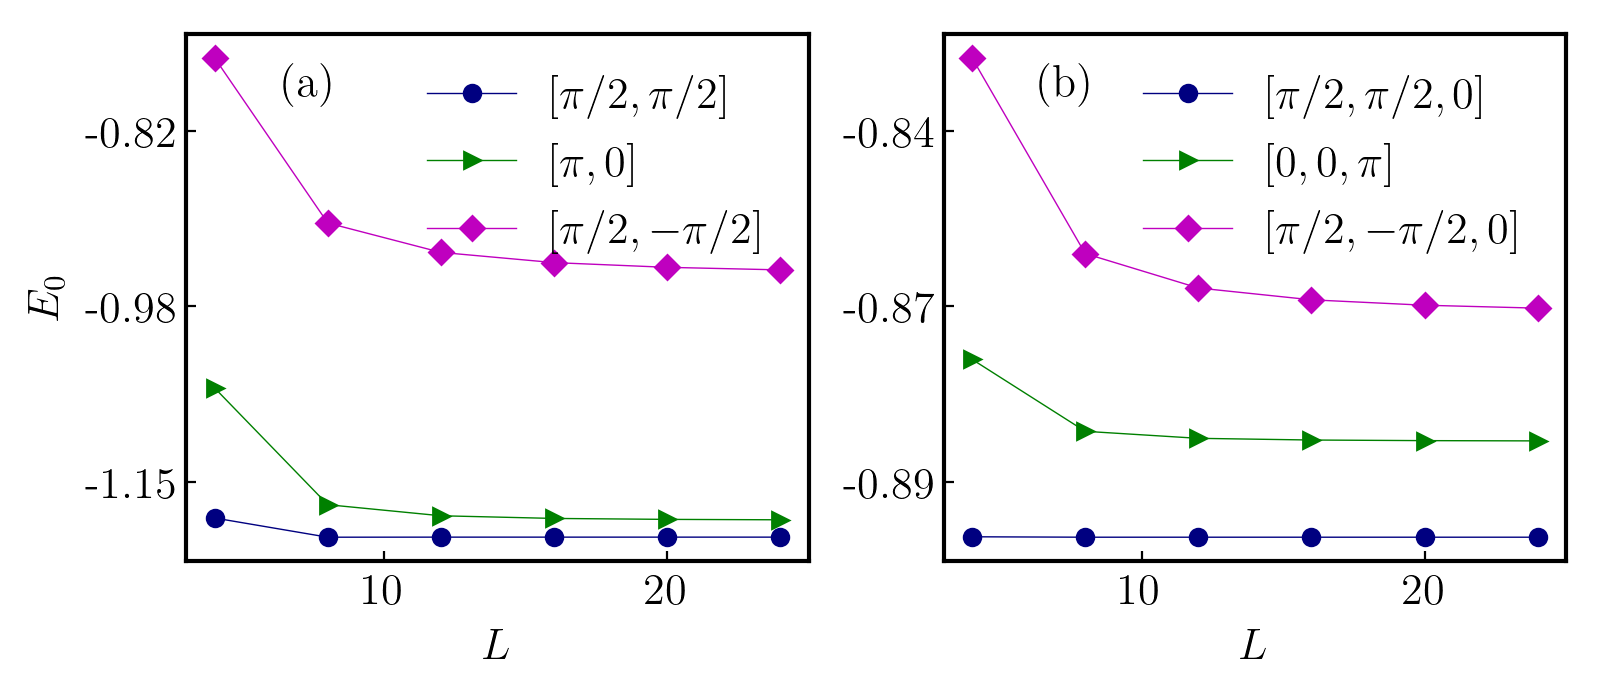

In [148]:
# Finite size efffect
x = [4, 8, 12, 16, 20, 24]

kagome0 = [-0.8990568837984378, -0.8991166324630729, -0.8991166371975619,
           -0.8991166371980516, -0.8991166371980518, -0.8991166371980468]
kagome1 = [-0.8739454789453408, -0.8841289659783903, -0.8851213455744561,
           -0.8853618467196530, -0.8854473854098791, -0.8854851749326755]
kagome2 = [-0.8628418305208072, -0.8643100031242846, -0.8634475642187901,
           -0.8644292511382212, -0.8645266881465347, -0.8642261573932040]
kagome3 = [-0.8312851924841107, -0.8589736522643410, -0.8638455508783024,
           -0.8655174712661523, -0.8662830162779305, -0.8666960114505278]

triangle0 = [-1.1830127018922196, -1.2010832613629656, -1.2010182710329496,
             -1.2010163267279121, -1.2010163435028303, -1.2010163444177013]
triangle1 = [-1.0606601717798214, -1.1704951288348660, -1.1809032578767968,
             -1.1834133051000109, -1.1843044663485411, -1.1846978306168525]
triangle2 = [-1.0000000000000004, -0.9861359120657515, -0.9797630547225589,
             -0.9886007357619138, -0.9892624715797299, -0.9866244372384116]
triangle3 = [-0.7500000000000003, -0.9053300858899108, -0.9330127018922193,
             -0.9426261547735965, -0.9470627272012561, -0.9494692640906437]


import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.patches as patches
import matplotlib.ticker as ticker

%matplotlib notebook

figFS = plt.figure (figsize=(8, 3.5))
fsize = 12
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc ('text', usetex=True)
plt.rc ('font', family='serif')

ax0 = figFS.add_subplot (121)
ax0.set_title (r'(a)', x=0.2, y=0.85, fontsize=fsize)
# ax0.set_xlim (, 2.0*PI)

ax0.plot (x, triangle0, color='navy', linewidth=0.5, marker='o', label='$[\pi/2, \pi/2]$')
ax0.plot (x, triangle1, color='green', linewidth=0.5, marker='>', label='$[\pi, 0]$')
ax0.plot (x, triangle3, color='m', linewidth=0.5, marker='D', label='$[\pi/2, -\pi/2]$')

start, end = ax0.get_ylim ()
length = end-start
ax0.yaxis.set_ticks (np.arange (start+length*0.15, end, length / 3.0))
ax0.yaxis.set_major_formatter (ticker.FormatStrFormatter ('%0.2f'))

ax0.tick_params (axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel (r'$L$', fontsize=fsize)
ax0.set_ylabel (r'$E_{0}$', fontsize=fsize)
ax0.legend (fontsize=fsize, frameon=False, loc='best')

ax1 = figFS.add_subplot (122)
ax1.set_title (r'(b)', x=0.2, y=0.85, fontsize=fsize)
# ax0.set_xlim (, 2.0*PI)

ax1.plot (x, kagome0, color='navy', linewidth=0.5, marker='o', label='$[\pi/2, \pi/2, 0]$')
ax1.plot (x, kagome1, color='green', linewidth=0.5, marker='>', label='$[0, 0, \pi]$')
ax1.plot (x, kagome3, color='m', linewidth=0.5, marker='D', label='$[\pi/2, -\pi/2, 0]$')

start, end = ax1.get_ylim ()
length = end-start
ax1.yaxis.set_ticks (np.arange (start+length*0.15, end, length / 3.0))
ax1.yaxis.set_major_formatter (ticker.FormatStrFormatter ('%0.2f'))

ax1.tick_params (axis='both', labelsize=fsize, direction='in')
ax1.set_xlabel (r'$L$', fontsize=fsize)
# ax1.set_ylabel (r'$E_{0}$', fontsize=fsize)
ax1.legend (fontsize=fsize, frameon=False, loc='best')

figFS.tight_layout ()
figFS.savefig ('free_finite_size.pdf', format='PDF')


